In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/laxmimerit/All-CSV-ML-Data-Files-Download/master/spam.tsv', sep='\t')
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [3]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [4]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [5]:
ham = df[df['label']=='ham']
ham.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
6,ham,Even my brother is not like to speak with me. ...,77,2


In [6]:
spam = df[df['label']=='spam']
spam.head()

,label,message,length,punct
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147,8
8,spam,WINNER!! As a valued network customer you have...,157,6
9,spam,Had your mobile 11 months or more? U R entitle...,154,2
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",136,8


In [7]:
ham.shape, spam.shape

((4825, 4), (747, 4))

In [8]:
ham = ham.sample(spam.shape[0])
ham.shape, spam.shape

((747, 4), (747, 4))

In [9]:
data = ham.append(spam, ignore_index=True)
data.tail()

,label,message,length,punct
1489,spam,Want explicit SEX in 30 secs? Ring 02073162414...,90,3
1490,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,158,5
1491,spam,Had your contract mobile 11 Mnths? Latest Moto...,160,8
1492,spam,REMINDER FROM O2: To get 2.50 pounds free call...,147,3
1493,spam,This is the 2nd time we have tried 2 contact u...,160,8


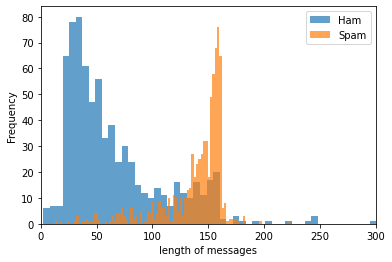

In [10]:

plt.hist(data[data['label']=='ham']['length'], bins = 100, alpha = 0.7,label='Ham')
plt.hist(data[data['label']=='spam']['length'], bins = 100, alpha = 0.7,label='Spam')
plt.xlabel('length of messages')
plt.ylabel('Frequency')
plt.legend()
plt.xlim(0,300)
plt.show()

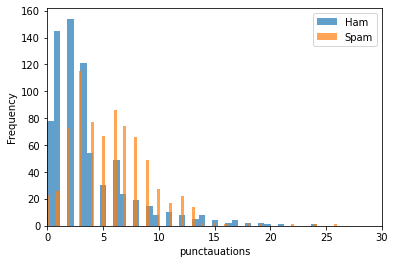

In [11]:
plt.hist(data[data['label']=='ham']['punct'], bins = 100, alpha = 0.7,label='Ham')
plt.hist(data[data['label']=='spam']['punct'], bins = 100, alpha = 0.7,label='Spam')
plt.xlabel('punctauations')
plt.ylabel('Frequency')
plt.legend()
plt.xlim(0,30)
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

In [13]:
data.head()


,label,message,length,punct
0,ham,Happy new year to u and ur family...may this n...,130,8
1,ham,Me i'm not workin. Once i get job...,36,5
2,ham,Just re read it and I have no shame but tell m...,138,2
3,ham,Never y lei... I v lazy... Got wat? Dat day ü ...,77,10
4,ham,if you text on your way to cup stop that shoul...,76,1


In [14]:
import nltk
nltk.download('punkt') # one time execution

[nltk_data] Downloading package punkt to C:\Users\Sudhanshu
[nltk_data]     Rawat\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [15]:
import gensim
from nltk.tokenize import word_tokenize
import numpy as np
embedding_dim=100
text=data['message']

Text=[]
for i in range(data.shape[0]):
    text1=word_tokenize(text[i])
    Text=text1+Text



model= gensim.models.Word2Vec(sentences=[Text], size=embedding_dim, workers=4, min_count=1)
words=list(model.wv.vocab)

# print(text1)
# print(model[text1])
# vector=list(map(lambda x: sum(x)/len(x), zip(*model[text1])))
# print(vector)
def word_2_vec(x):
    t1=word_tokenize(x)
    model[t1]
    v=list(map(lambda y: sum(y)/len(y), zip(*model[t1])))
    a=np.array(v)
    return a.reshape(1,-1)

### **Applying word2vec to each text message**

In [16]:
data['vec']=data['message'].apply(lambda x: word_2_vec(x))
data.head()

<ipython-input-15-d35cf2fd985e>:23: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  model[t1]
<ipython-input-15-d35cf2fd985e>:24: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  v=list(map(lambda y: sum(y)/len(y), zip(*model[t1])))


,label,message,length,punct,vec
0,ham,Happy new year to u and ur family...may this n...,130,8,"[[-0.013170078039235835, -0.027727627031189122..."
1,ham,Me i'm not workin. Once i get job...,36,5,"[[-0.005861080209301276, -0.018581312927629122..."
2,ham,Just re read it and I have no shame but tell m...,138,2,"[[-0.011585962973185815, -0.02435527997861047,..."
3,ham,Never y lei... I v lazy... Got wat? Dat day ü ...,77,10,"[[-0.002032963832872073, -0.006650729919783771..."
4,ham,if you text on your way to cup stop that shoul...,76,1,"[[-0.01425903228422006, -0.03303822799352929, ..."


In [17]:
w_vec=np.concatenate(data['vec'].to_numpy(), axis=0)
w_vec.shape

(1494, 100)

In [18]:
word_vec=pd.DataFrame(w_vec)
word_vec.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.013170,-0.027728,-0.014880,-0.005146,-0.001924,0.000826,-0.004126,0.026238,-0.002962,0.031891,...,-0.026195,0.009367,-0.005389,0.027584,-0.039432,-0.019647,0.000737,-0.015519,-0.024403,0.016064
1,-0.005861,-0.018581,-0.008647,-0.002499,0.000306,0.000745,-0.002124,0.016227,-0.000964,0.019394,...,-0.014542,0.004905,-0.002139,0.017271,-0.023171,-0.011364,0.001052,-0.009843,-0.014337,0.008558
2,-0.011586,-0.024355,-0.012168,-0.003935,-0.001259,0.000124,-0.003878,0.022200,-0.002839,0.026670,...,-0.021674,0.008313,-0.004370,0.022523,-0.033274,-0.017702,-0.000341,-0.013658,-0.021191,0.013211
3,-0.002033,-0.006651,-0.003204,-0.001960,-0.000117,-0.000474,-0.000195,0.005974,-0.001689,0.007950,...,-0.005954,0.001161,-0.001390,0.006596,-0.010993,-0.003592,0.000520,-0.004428,-0.005832,0.002810
4,-0.014259,-0.033038,-0.017530,-0.004657,-0.000980,0.001219,-0.005474,0.030063,-0.004728,0.036064,...,-0.028248,0.012120,-0.005649,0.029963,-0.043331,-0.025007,0.000483,-0.018779,-0.027553,0.019584


In [19]:
X_train, X_test, y_train, y_test = train_test_split(word_vec, data['label'], test_size = 0.3, random_state=0, shuffle = True, stratify=data['label'])

SVM

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
Parameter_svc=[{'cache_size': [300,400,200],'tol': [0.0011,0.002,0.003],
                'kernel': ['rbf','poly'],
               'degree': [3,4,5]}]
scores = ['accuracy']

clf_svc = GridSearchCV(SVC(), Parameter_svc, scoring='accuracy', verbose=2, cv=5
                         )
clf_svc.fit(X_train,y_train)


print(clf_svc.best_params_)

y_pred1 = clf_svc.predict(X_test)

accuracy_score(y_pred1,y_test)

=   0.0s
[CV] END ...cache_size=300, degree=3, kernel=poly, tol=0.002; total time=   0.1s
[CV] END ...cache_size=300, degree=3, kernel=poly, tol=0.003; total time=   0.0s
[CV] END ...cache_size=300, degree=3, kernel=poly, tol=0.003; total time=   0.0s
[CV] END ...cache_size=300, degree=3, kernel=poly, tol=0.003; total time=   0.1s
[CV] END ...cache_size=300, degree=3, kernel=poly, tol=0.003; total time=   0.1s
[CV] END ...cache_size=300, degree=3, kernel=poly, tol=0.003; total time=   0.1s
[CV] END ...cache_size=300, degree=4, kernel=rbf, tol=0.0011; total time=   0.1s
[CV] END ...cache_size=300, degree=4, kernel=rbf, tol=0.0011; total time=   0.1s
[CV] END ...cache_size=300, degree=4, kernel=rbf, tol=0.0011; total time=   0.1s
[CV] END ...cache_size=300, degree=4, kernel=rbf, tol=0.0011; total time=   0.1s
[CV] END ...cache_size=300, degree=4, kernel=rbf, tol=0.0011; total time=   0.1s
[CV] END ....cache_size=300, degree=4, kernel=rbf, tol=0.002; total time=   0.1s
[CV] END ....cache_

0.7060133630289532

Random_Forest classifier

In [21]:
from sklearn.ensemble import RandomForestClassifier
RF_Cl=RandomForestClassifier(n_estimators=900)
RF_Cl.fit(X_train,y_train)
y_pred=RF_Cl.predict(X_test)

In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.80      0.83      0.81       225
        spam       0.82      0.79      0.81       224

    accuracy                           0.81       449
   macro avg       0.81      0.81      0.81       449
weighted avg       0.81      0.81      0.81       449



Classification of texts using TFidf


In [23]:
X_train, X_test, y_train, y_test = train_test_split(data['message'], data['label'], test_size = 0.3, random_state=0, shuffle = True, stratify=data['label'])
vectorizer = TfidfVectorizer()
X_train_vect = vectorizer.fit_transform(X_train)
X_train_vect.shape

(1045, 3642)

Pipeline and Random_Forest classifier

In [24]:
clf_rf = Pipeline([('tfidf', TfidfVectorizer()), ('clf', RandomForestClassifier(n_estimators=100, n_jobs=-1))])
clf_rf.fit(X_train, y_train)
y_pred = clf_rf.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[225,   0],
       [ 27, 197]], dtype=int64)

In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.89      1.00      0.94       225
        spam       1.00      0.88      0.94       224

    accuracy                           0.94       449
   macro avg       0.95      0.94      0.94       449
weighted avg       0.95      0.94      0.94       449



In [26]:
accuracy_score(y_test, y_pred)

0.9398663697104677

Support Vector Machine

In [27]:
clf_svc = Pipeline([('tfidf', TfidfVectorizer()), ('clf', SVC(C = 1000, gamma = 'auto'))])
clf_svc.fit(X_train, y_train)
y_pred = clf_svc.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[224,   1],
       [ 19, 205]], dtype=int64)

In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.92      1.00      0.96       225
        spam       1.00      0.92      0.95       224

    accuracy                           0.96       449
   macro avg       0.96      0.96      0.96       449
weighted avg       0.96      0.96      0.96       449



In [29]:
accuracy_score(y_test, y_pred)

0.955456570155902

Saving model

In [30]:
import pickle as pkl
with open('model.pkl','wb') as file:
    pkl.dump(clf_svc,file)


In [31]:
clf_svc.predict(["Hey, whassup?"])

array(['ham'], dtype=object)

In [32]:
with open('model.pkl','rb') as f:
    data=pkl.load(f)

In [33]:
data.predict(['Hey, whatssup?'])

array(['ham'], dtype=object)